# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](../../data/form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them. You can explore it in the [assignment notebook](assignment.ipynb).

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information. 

In [1]:
!pip install pandas
!pip install matplotlib

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
form_df = pd.read_csv("form.csv")
print(form_df)


  birth_month       state   pet
0     January         NaN  Cats
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     january          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


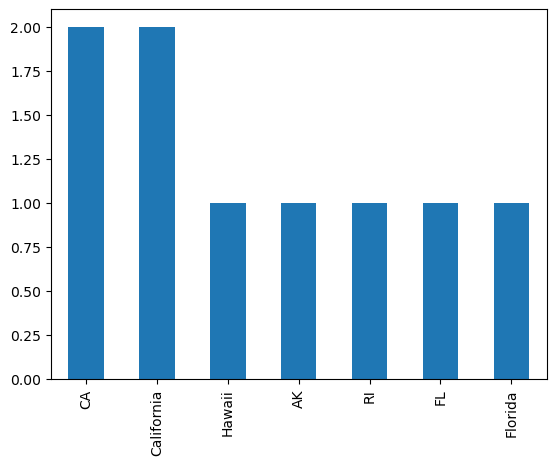

In [7]:
form_df['state'].value_counts().plot(kind='bar');
plt.show()

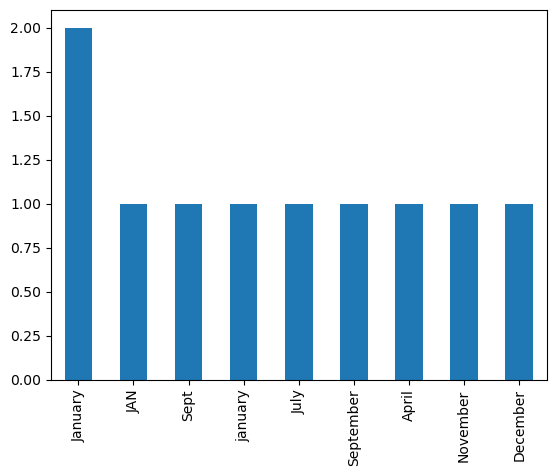

In [8]:
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

# Solutions:
# Recommendations

### 1. Standardize Input Formats:

In [10]:

import pandas as pd

# Example: Provide dropdown options for birth month and state
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

birth_month = pd.Series(months)
state = pd.Series(states)


### 2. Input Validation:

In [ ]:
def validate_birth_month(month):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    return month.capitalize() in months

# Usage
birth_month = input("Enter birth month: ")
if validate_birth_month(birth_month):
    print("Valid birth month!")
else:
    print("Invalid birth month. Please enter a valid month.")


### 3. Data Cleaning:

In [11]:
# Example: Convert state abbreviations to uppercase
form_df['state'] = form_df['state'].str.upper()

### 4. Handle Missing Data:

In [12]:
# Example: Provide default value for missing state
form_df['state'].fillna("Unknown", inplace=True)


### 5. User Guidance:

In [13]:
# Example: Provide instructions for filling out the form
print("Please enter your information below:")
print("Birth Month: Enter the full name of your birth month (e.g., January)")
print("State: Enter the full name or abbreviation of your state (e.g., California or CA)")


Please enter your information below:
Birth Month: Enter the full name of your birth month (e.g., January)
State: Enter the full name or abbreviation of your state (e.g., California or CA)


### 6. Feedback Mechanisms:

In [14]:
# Example: Notify user of errors in input
if not validate_birth_month(birth_month):
    print("Error: Invalid birth month. Please enter a valid month.")

NameError: name 'validate_birth_month' is not defined

### 7. Regular Audits:

In [15]:
# Example: Perform data quality check
inconsistent_states = form_df['state'].unique()
print("Inconsistent states:", inconsistent_states)

Inconsistent states: ['Unknown' 'CA' 'HAWAII' 'AK' 'RI' 'CALIFORNIA' 'FL' 'FLORIDA']


### 8. Handle Missing Values:
Replacing 'NaN' in the 'state' column with 'Unknown'

In [16]:
form_df['state'].fillna('Unknown', inplace=True) 

print(form_df)

  birth_month       state   pet
0     January     Unknown  Cats
1         JAN          CA  Cats
2        Sept      HAWAII   Dog
3     january          AK   Dog
4        July          RI  Cats
5   September  CALIFORNIA  Cats
6       April          CA   Dog
7     January  CALIFORNIA  Cats
8    November          FL   Dog
9    December     FLORIDA  Cats


### 9. Standardize State Names:
Converting all abbreviations to full names


In [17]:
state_full = {'CA': 'California', 'AK': 'Alaska', 'RI': 'Rhode Island', 'FL': 'Florida'}
form_df['state'] = form_df['state'].map(state_full).fillna(form_df['state'])
print(form_df)

  birth_month         state   pet
0     January       Unknown  Cats
1         JAN    California  Cats
2        Sept        HAWAII   Dog
3     january        Alaska   Dog
4        July  Rhode Island  Cats
5   September    CALIFORNIA  Cats
6       April    California   Dog
7     January    CALIFORNIA  Cats
8    November       Florida   Dog
9    December       FLORIDA  Cats


### 10. Standardize Birth Month Names:
Standardize the month names by Converting month name abbreviations to full names and changing the case to uniform case

In [18]:
#Converting to title Case
form_df['birth_month'] = form_df['birth_month'].str.title() 

# Month mapping
month = {'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April', 'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August', 'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'}
form_df['birth_month'] = form_df['birth_month'].map(month).fillna(form_df['birth_month'])


print(form_df)

  birth_month         state   pet
0     January       Unknown  Cats
1     January    California  Cats
2        Sept        HAWAII   Dog
3     January        Alaska   Dog
4        July  Rhode Island  Cats
5   September    CALIFORNIA  Cats
6       April    California   Dog
7     January    CALIFORNIA  Cats
8    November       Florida   Dog
9    December       FLORIDA  Cats


### 11.  Re-plot Visualizations:

###  Visualize counts of states

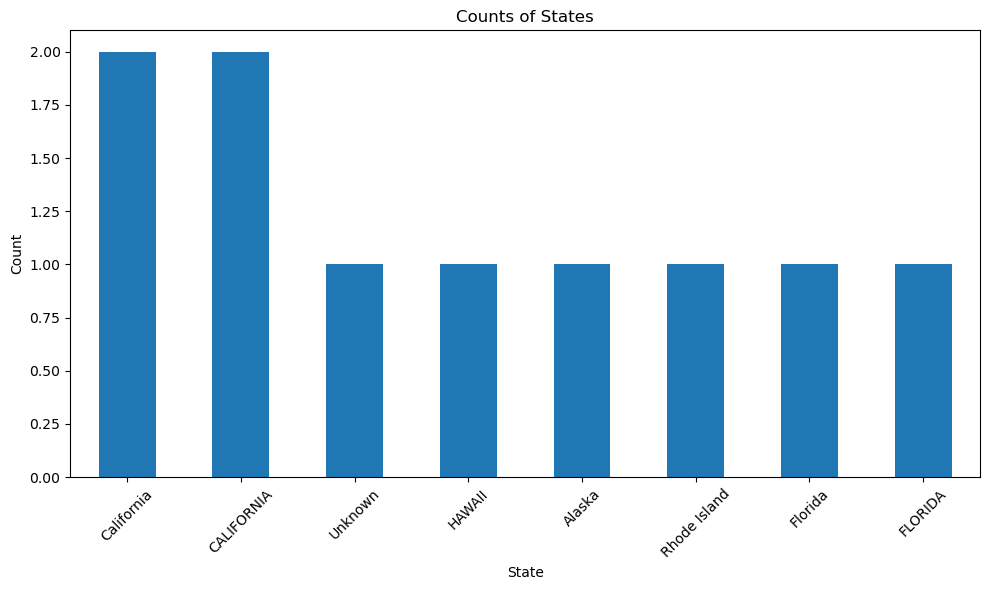

In [19]:
plt.figure(figsize=(10, 6))
form_df['state'].value_counts().plot(kind='bar')
plt.title('Counts of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualize counts of birth months

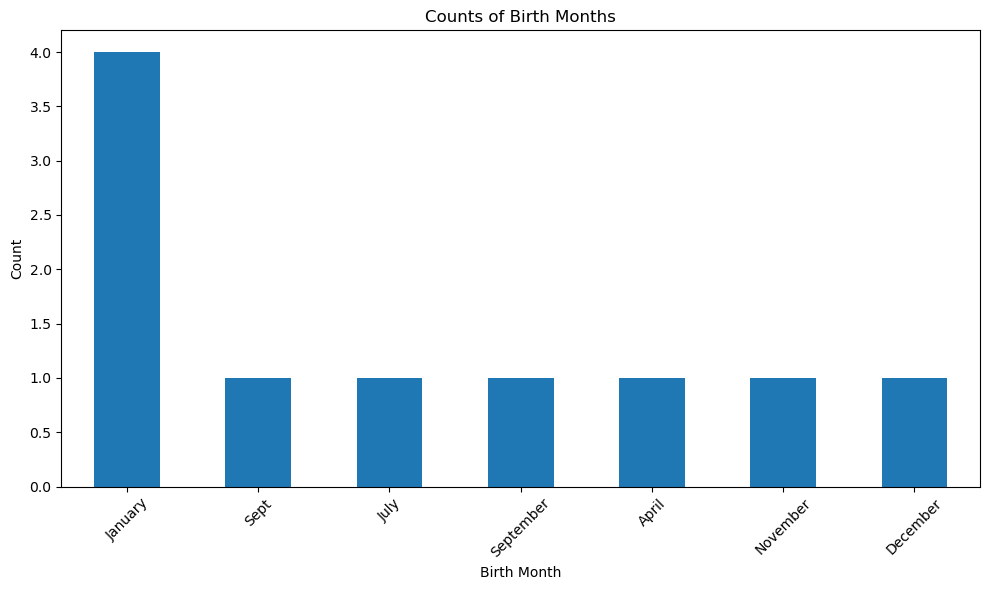

In [20]:
plt.figure(figsize=(10, 6))
form_df['birth_month'].value_counts().plot(kind='bar')
plt.title('Counts of Birth Months')
plt.xlabel('Birth Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pie Chart of Pet Ownership:

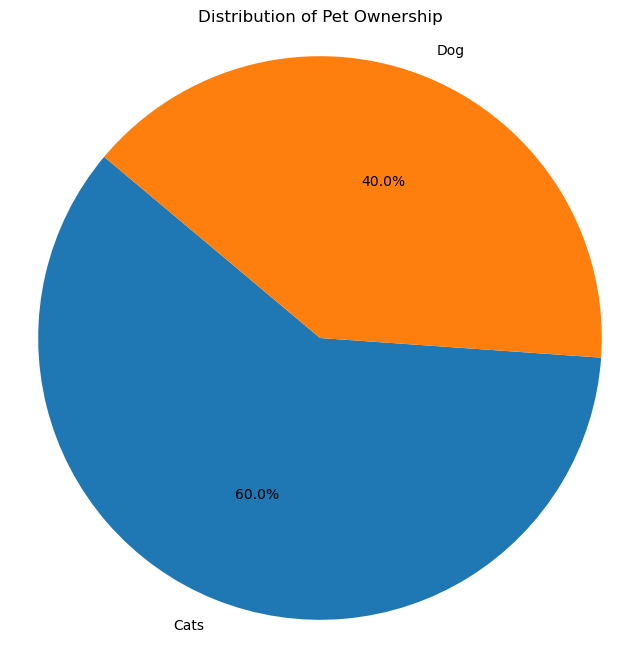

In [24]:
plt.figure(figsize=(8, 8))
pet_counts = form_df['pet'].value_counts()
plt.pie(pet_counts, labels=pet_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pet Ownership')
plt.axis('equal')
plt.show()

### Boxplot of Age by State:

### Scatter Plot of Age vs. Income: